# Problem 1

First we need to clone the github repo

In [61]:
!git clone https://github.com/qfgaohao/pytorch-ssd.git

Cloning into 'pytorch-ssd'...
remote: Enumerating objects: 812, done.
remote: Total 812 (delta 0), reused 0 (delta 0), pack-reused 812
Receiving objects: 100% (812/812), 1.05 MiB | 2.09 MiB/s, done.
Resolving deltas: 100% (544/544), done.


In [22]:
from google.colab import drive
drive.mount('/content/gdrive')
# !tar -xf gdrive/MyDrive/DLS-Homework5/VOCtest_06-Nov-2007.tar -C ./

Mounted at /content/gdrive


# Part 1

Download pretrained pytorch MobilenetV1 SSD and test it locally using Pascal VOC 2007 dataset.

Show the test accuracy for the 20 classes.

In [2]:
!wget -P models https://storage.googleapis.com/models-hao/mobilenet-v1-ssd-mp-0_675.pth
!wget -P models https://storage.googleapis.com/models-hao/voc-model-labels.txt

--2022-05-06 15:00:53--  https://storage.googleapis.com/models-hao/mobilenet-v1-ssd-mp-0_675.pth
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 74.125.24.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37995286 (36M) [application/octet-stream]
Saving to: ‘models/mobilenet-v1-ssd-mp-0_675.pth’

mobilenet-v1-ssd-mp 100%[===================>]  36.23M  17.7MB/s    in 2.0s    

2022-05-06 15:00:56 (17.7 MB/s) - ‘models/mobilenet-v1-ssd-mp-0_675.pth’ saved [37995286/37995286]

--2022-05-06 15:00:56--  https://storage.googleapis.com/models-hao/voc-model-labels.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 74.125.200.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 145 [text/plain]

### Accuracy

The accuracy is shown at the end of this cell's output

In [4]:
!python pytorch-ssd/eval_ssd.py --net mb1-ssd --dataset VOCdevkit/VOC2007/ --trained_model models/mobilenet-v1-ssd-mp-0_675.pth --label_file models/voc-model-labels.txt

Streaming output truncated to the last 5000 lines.
Load Image: 0.003214 seconds.
Inference time:  0.006302595138549805
Prediction: 0.014487 seconds.
process image 3709
Load Image: 0.003529 seconds.
Inference time:  0.0065364837646484375
Prediction: 0.043021 seconds.
process image 3710
Load Image: 0.003375 seconds.
Inference time:  0.006327629089355469
Prediction: 0.026103 seconds.
process image 3711
Load Image: 0.003846 seconds.
Inference time:  0.0059392452239990234
Prediction: 0.040807 seconds.
process image 3712
Load Image: 0.003167 seconds.
Inference time:  0.006053924560546875
Prediction: 0.024672 seconds.
process image 3713
Load Image: 0.002903 seconds.
Inference time:  0.006012916564941406
Prediction: 0.018694 seconds.
process image 3714
Load Image: 0.003270 seconds.
Inference time:  0.006053924560546875
Prediction: 0.023590 seconds.
process image 3715
Load Image: 0.001944 seconds.
Inference time:  0.005785942077636719
Prediction: 0.021796 seconds.
process image 3716
Load Image:

# Part 2

Select any two related categories from Google Open Images dataset and finetune the pretrained SSD model. Examples include, Aircraft and Aeroplane, Handgun and Shotgun. You can use open_images_downloader.py script provided at the github to download the data. For finetuning you can use the same parameters as in the tutorial below. Compute the accuracy of the test data for these categories before and after finetuning.

The two categories that I chose are airplanes, and helicopters.

In [90]:
!pip install boto3
!python3 pytorch-ssd/open_images_downloader.py --root open_images --class_names "Airplane, Helicopter" --num_workers 20

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
2022-05-07 08:37:03,905 - root - Download https://storage.googleapis.com/openimages/2018_04/class-descriptions-boxable.csv.
2022-05-07 08:37:04,079 - root - Download https://storage.googleapis.com/openimages/2018_04/train/train-annotations-bbox.csv.
2022-05-07 08:38:01,581 - root - Read annotation file open_images/train-annotations-bbox.csv
2022-05-07 08:38:20,867 - root - train bounding boxes size: 24308
2022-05-07 08:38:20,867 - root - Approximate Image Stats: 
2022-05-07 08:38:20,888 - root - Airplane: 12003/14401 = 0.83.
2022-05-07 08:38:20,888 - root - Helicopter: 2398/14401 = 0.17.
2022-05-07 08:38:20,890 - r

### Training SSD on Airplanes and Helicopters

I decided to stop the finetuning after 40 epochs because the loss stoped decreasing and it looked like it would start increasing if we left it running.

In [6]:
!python3 pytorch-ssd/train_ssd.py --dataset_type open_images --datasets open_images --net mb1-ssd --pretrained_ssd models/mobilenet-v1-ssd-mp-0_675.pth --scheduler cosine --lr 0.01 --t_max 100 --validation_epochs 5 --num_epochs 100 --base_net_lr 0.001  --batch_size 5

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
2022-05-05 09:57:18,462 - root - INFO - Use Cuda.
2022-05-05 09:57:18,462 - root - INFO - Namespace(balance_data=False, base_net=None, base_net_lr=0.001, batch_size=5, checkpoint_folder='models/', dataset_type='open_images', datasets=['open_images'], debug_steps=100, extra_layers_lr=None, freeze_base_net=False, freeze_net=False, gamma=0.1, lr=0.01, mb2_width_mult=1.0, milestones='80,100', momentum=0.9, net='mb1-ssd', num_epochs=100, num_workers=4, pretrained_ssd='models/mobilenet-v1-ssd-mp-0_675.pth', resume=None, scheduler='cosine', t_max=100.0, use_cuda=True, validation_dataset=None, validation_epochs=5, weight_decay=0.0005)
2022-05-05 09:57:18,462 - root - INFO - Prepare training datasets.
2022-05-05 09:57:25,551 - root - INFO - Dataset Summary:Number of Images: 14228
Minimum Number of Images fo

In [14]:
!cp -r ./models gdrive/MyDrive/DLS-Homework5/models

### Testing without finetunning

In this case, we can test the model before finetuning, but after we remove the classificatioin and regression head of the network. We can test this model using the --pretrained flag which will replace the last layer so that we can have two classes instead of the 20 that we had previously.  

In [12]:
!python3 pytorch-ssd/eval_ssd.py --net mb1-ssd --dataset_type open_images --dataset open_images --trained_model models/mobilenet-v1-ssd-mp-0_675.pth --pretrained True --label_file models/open-images-model-labels.txt

Streaming output truncated to the last 5000 lines.
Prediction: 0.031492 seconds.
process image 1532
Load Image: 0.016309 seconds.
Inference time:  0.005675554275512695
Prediction: 0.031066 seconds.
process image 1533
Load Image: 0.009946 seconds.
Inference time:  0.00559234619140625
Prediction: 0.033874 seconds.
process image 1534
Load Image: 0.006570 seconds.
Inference time:  0.005890369415283203
Prediction: 0.034833 seconds.
process image 1535
Load Image: 0.008400 seconds.
Inference time:  0.005676984786987305
Prediction: 0.038272 seconds.
process image 1536
Load Image: 0.015315 seconds.
Inference time:  0.005548000335693359
Prediction: 0.034212 seconds.
process image 1537
Load Image: 0.015903 seconds.
Inference time:  0.005513906478881836
Prediction: 0.034243 seconds.
process image 1538
Load Image: 0.015123 seconds.
Inference time:  0.00542449951171875
Prediction: 0.032652 seconds.
process image 1539
Load Image: 0.011122 seconds.
Inference time:  0.005380392074584961
Prediction: 0.0

### Testing with finetunning

In [14]:
!python pytorch-ssd/eval_ssd.py --net mb1-ssd --dataset_type open_images --dataset open_images --trained_model models/mb1-ssd-Epoch-40-Loss-1.7454627736223687.pth --label_file models/open-images-model-labels.txt

Streaming output truncated to the last 5000 lines.
Prediction: 0.016941 seconds.
process image 1532
Load Image: 0.017121 seconds.
Inference time:  0.006127834320068359
Prediction: 0.022321 seconds.
process image 1533
Load Image: 0.009551 seconds.
Inference time:  0.004939556121826172
Prediction: 0.016737 seconds.
process image 1534
Load Image: 0.006196 seconds.
Inference time:  0.004866361618041992
Prediction: 0.015820 seconds.
process image 1535
Load Image: 0.007385 seconds.
Inference time:  0.004937887191772461
Prediction: 0.016484 seconds.
process image 1536
Load Image: 0.013469 seconds.
Inference time:  0.005542755126953125
Prediction: 0.021511 seconds.
process image 1537
Load Image: 0.014086 seconds.
Inference time:  0.005110979080200195
Prediction: 0.015731 seconds.
process image 1538
Load Image: 0.013227 seconds.
Inference time:  0.004958152770996094
Prediction: 0.015914 seconds.
process image 1539
Load Image: 0.010415 seconds.
Inference time:  0.004872798919677734
Prediction: 0

# Part 3

Convert the Pytorch model to ONNX format and save it.

In [3]:
!pip install onnx

     |████████████████████████████████| 12.8 MB 34.4 MB/s 


In [19]:
# some_file.py
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, 'pytorch-ssd')

from vision.ssd.mobilenetv1_ssd import create_mobilenetv1_ssd
import torch.onnx
import onnx

model_path = "models/mb1-ssd-Epoch-40-Loss-1.7454627736223687.pth"
label_path = "models/open-images-model-labels.txt"

class_names = [name.strip() for name in open(label_path).readlines()]
num_classes = len(class_names)

net = create_mobilenetv1_ssd(len(class_names), is_test=True)
net.load(model_path)
net = net.to("cuda")
net.eval()
net_type = "mb1-ssd"
model_path = f"models/{net_type}.onnx"
# init_net_path = f"models/{net_type}_init_net.pb"
# init_net_txt_path = f"models/{net_type}_init_net.pbtxt"
# predict_net_path = f"models/{net_type}_predict_net.pb"
# predict_net_txt_path = f"models/{net_type}_predict_net.pbtxt"

dummy_input = torch.randn(1, 3, 300, 300, device="cuda")
torch.onnx.export(net, dummy_input, model_path, verbose=True, output_names=['scores', 'boxes'])

model = onnx.load(model_path)

graph(%input.1 : Float(1, 3, 300, 300, strides=[270000, 90000, 300, 1], requires_grad=0, device=cuda:0),
      %extras.0.0.weight : Float(256, 1024, 1, 1, strides=[1024, 1, 1, 1], requires_grad=1, device=cuda:0),
      %extras.0.0.bias : Float(256, strides=[1], requires_grad=1, device=cuda:0),
      %extras.0.2.weight : Float(512, 256, 3, 3, strides=[2304, 9, 3, 1], requires_grad=1, device=cuda:0),
      %extras.0.2.bias : Float(512, strides=[1], requires_grad=1, device=cuda:0),
      %extras.1.0.weight : Float(128, 512, 1, 1, strides=[512, 1, 1, 1], requires_grad=1, device=cuda:0),
      %extras.1.0.bias : Float(128, strides=[1], requires_grad=1, device=cuda:0),
      %extras.1.2.weight : Float(256, 128, 3, 3, strides=[1152, 9, 3, 1], requires_grad=1, device=cuda:0),
      %extras.1.2.bias : Float(256, strides=[1], requires_grad=1, device=cuda:0),
      %extras.2.0.weight : Float(128, 256, 1, 1, strides=[256, 1, 1, 1], requires_grad=1, device=cuda:0),
      %extras.2.0.bias : Float(12

# Part 4
Visualize the model using net drawer tool. Compile the model using embed_docstring flag and show the visualization output. Also show doc string (stack trace for PyTorch) for different types of nodes.

In [5]:
!git clone https://github.com/onnx/onnx.git

Cloning into 'onnx'...
remote: Enumerating objects: 30606, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 30606 (delta 7), reused 10 (delta 4), pack-reused 30583
Receiving objects: 100% (30606/30606), 20.69 MiB | 11.33 MiB/s, done.
Resolving deltas: 100% (17356/17356), done.


In [20]:
!python onnx/onnx/tools/net_drawer.py --input models/mb1-ssd.onnx --output mb1-ssd.dot --embed_docstring
!dot -Tsvg mb1-ssd.dot -o mb1-ssd.svg
# !cp mb1-ssd.dot gdrive/MyDrive/DLS-Homework5/mb1-ssd.dot 
# !cp mb1-ssd.svg gdrive/MyDrive/DLS-Homework5/mb1-ssd.svg

Since the svg is too large, I will simply take a screenshot of it to prove that I did it, and I will attach the svg file to the submission. ![](images/model_graph.png)

The stack trace for nodes of different types are: 

Convolutional Nodes ![](images/conv_node.png) and the stack trace of this particular conv node is: ![](images/conv_node_trace.png) ReLU nodes ![](images/relu_node.png) with stack trace: ![](images/relu_node_trace.png) And finally, transpose nodes: ![](images/transpose_node.png) with the stack trace: ![](images/transpose_node_trace.png)

# Part 5
Deploy the ONNX model on ONNX runtime (ORT) server. You need to set up the environment following steps listed in the tutorial. Then you need make HTTP request to the ORT server. Test the inferencing set-up using 1 image from each of the two selected categories.

In [2]:
!docker pull mcr.microsoft.com/onnxruntime/server

Using default tag: latest
latest: Pulling from onnxruntime/server
Digest: sha256:a23da0977bbc4aca4d3de56ad648ebde86031e61d7a3b7cbe1daaebbc7f6ad3d
Status: Image is up to date for mcr.microsoft.com/onnxruntime/server:latest
mcr.microsoft.com/onnxruntime/server:latest


I then ran this command in the terminal to start docker. 
```bash
docker run -it -v $(pwd):$(pwd) -p 9050:8001 mcr.microsoft.com/onnxruntime/server --model_path $(pwd)/mb1-ssd.onnx
```

In [255]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

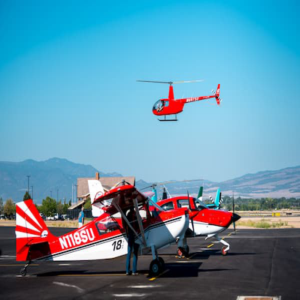

In [270]:
# Load the raw image
img = Image.open("assets/test_both.jpeg")
img = img.resize((300, 300), Image.BILINEAR)

# Let us see what the input image looks like
img

In [272]:
# Preprocess and normalize the image
def preprocess_and_normalize(img):
    img_data = np.array(img)
    img_data = np.transpose(img_data, [2, 0, 1])
    img_data = np.expand_dims(img_data, 0)
    mean_vec = np.array([0.485, 0.456, 0.406])
    stddev_vec = np.array([0.229, 0.224, 0.225])
    norm_img_data = np.zeros(img_data.shape).astype('float32')
    for i in range(img_data.shape[1]):
        norm_img_data[:,i,:,:] = (img_data[:,i,:,:]/255 - mean_vec[i]) / stddev_vec[i]
    return norm_img_data

norm_img_data = preprocess_and_normalize(img)

In [274]:
import assets.onnx_ml_pb2 as onnx_ml_pb2
import assets.predict_pb2 as predict_pb2
import requests

def send_message_ort(img_data):
    # Create request message to be sent to the ORT server
    input_tensor = onnx_ml_pb2.TensorProto()
    input_tensor.dims.extend(img_data.shape)
    input_tensor.data_type = 1
    input_tensor.raw_data = img_data.tobytes()

    request_message = predict_pb2.PredictRequest()

    # For your model, the inputs name should be something else customized by yourself. Use Netron to find out the input name.
    request_message.inputs["input.1"].data_type = input_tensor.data_type
    request_message.inputs["input.1"].dims.extend(input_tensor.dims)
    request_message.inputs["input.1"].raw_data = input_tensor.raw_data

    content_type_headers = ['application/x-protobuf', 'application/octet-stream', 'application/vnd.google.protobuf']

    for h in content_type_headers:
        request_headers = {
            'Content-Type': h,
            'Accept': 'application/x-protobuf'
        }
    # Inference run using ORT server
    # Change the number 9001 to the appropriate port number if you had changed it during ORT Server docker instantiation
    PORT_NUMBER = 9050 # Change appropriately if needed based on any changes when invoking the server in the pre-requisites
    inference_url = "http://127.0.0.1:" + str(PORT_NUMBER) + "/v1/models/default/versions/1:predict"
    response = requests.post(inference_url, headers=request_headers, data=request_message.SerializeToString())
    return response

response = send_message_ort(norm_img_data)

The code for the inference for the two images is after part 6

# Part 6
Parse the response message from the ORT server and annotate the two images. Show inferencing output (bounding boxes with labels) for the two images. (4)

In [275]:
def parse_response(response):
    # Parse response message
    response_message = predict_pb2.PredictResponse()
    response_message.ParseFromString(response.content)
    # For your model, the outputs names should be something else customized by yourself. Use Netron to find out the outputs names.
    boxes = np.frombuffer(response_message.outputs['boxes'].raw_data, dtype=np.float32)
    # labels = np.frombuffer(response_message.outputs['labels'].raw_data, dtype=np.int64)
    scores = np.frombuffer(response_message.outputs['scores'].raw_data, dtype=np.float32)
    # print('Boxes shape:', response_message.outputs['boxes'].dims)
    # # print('Labels shape:', response_message.outputs['labels'].dims)
    # print('Scores shape:', response_message.outputs['scores'].dims)
    boxes = boxes.reshape(response_message.outputs['boxes'].dims)
    scores = scores.reshape(response_message.outputs['scores'].dims)
    return boxes, scores

boxes, scores = parse_response(response)

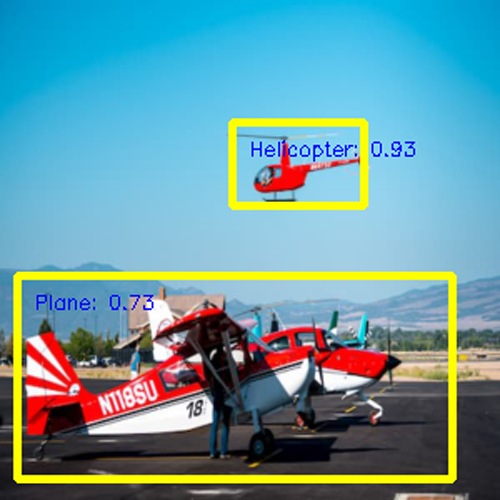

In [276]:
import cv2
import torch
from torchvision import transforms
# some_file.py
import sys
import copy
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, 'pytorch-ssd')
from vision.utils import box_utils

class_names = ('Background', 'Plane', 'Helicopter')

def get_results(image, boxes, scores):
    boxes = torch.tensor(boxes)
    scores = torch.tensor(scores)

    prob_threshold = 0.4
    filter_threshold = 0.01
    height, width = 300, 300

    boxes = boxes[0]
    scores = scores[0]

    if not prob_threshold:
        prob_threshold = filter_threshold

    # this version of nms is slower on GPU, so we move data to CPU.
    boxes = boxes.to("cpu")
    scores = scores.to("cpu")
    picked_box_probs = []
    picked_labels = []
    for class_index in range(1, scores.size(1)):
        probs = scores[:, class_index]
        mask = probs > prob_threshold
        probs = probs[mask]
        if probs.size(0) == 0:
            continue
        subset_boxes = boxes[mask, :]
        box_probs = torch.cat([subset_boxes, probs.reshape(-1, 1)], dim=1)
        box_probs = box_utils.nms(box_probs, None, score_threshold=prob_threshold, iou_threshold=0.45, sigma=0.5, top_k=10)
        picked_box_probs.append(box_probs)
        picked_labels.extend([class_index] * box_probs.size(0))
    if not picked_box_probs:
        torch.tensor([]), torch.tensor([]), torch.tensor([])
    picked_box_probs = torch.cat(picked_box_probs)
    picked_box_probs[:, 0] *= width
    picked_box_probs[:, 1] *= height
    picked_box_probs[:, 2] *= width
    picked_box_probs[:, 3] *= height
    boxes, labels, probs = picked_box_probs[:, :4], torch.tensor(picked_labels), picked_box_probs[:, 4]

    res = np.array(image)
    for i in range(boxes.size(0)):
        box = np.array(boxes[i, :])
        box = [int(x) for x in box]
        cv2.rectangle(res, (box[0], box[1],), (box[2], box[3],), (255, 255, 0), 4)
        #label = f"""{voc_dataset.class_names[labels[i]]}: {probs[i]:.2f}"""
        label = f"{class_names[labels[i]]}: {probs[i]:.2f}"
        cv2.putText(res, label,
                    (box[0] + 10, box[1] + 20),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.4,  # font scale
                    (0, 0, 255),
                    1)  # line type
    return res

result_image = get_results(img, boxes, scores)
path = "run_ssd_example_output.jpg"
res = cv2.resize(result_image, dsize=(500, 500), interpolation=cv2.INTER_CUBIC)
result = Image.fromarray(res, 'RGB')
result.save(path)
result

### Now we can do part 5 and 6 with another picture

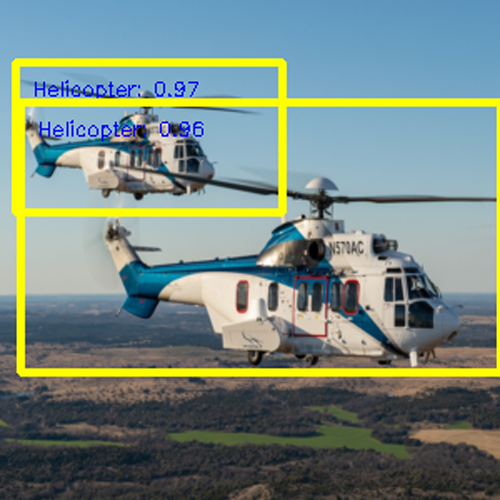

In [283]:
img = Image.open("assets/fleet.jpeg")
img = img.resize((300, 300), Image.BILINEAR)

norm_img_data = preprocess_and_normalize(img)
response = send_message_ort(norm_img_data)
boxes, scores = parse_response(response)
result_image = get_results(img, boxes, scores)
path = "run_ssd_example_output.jpg"
res = cv2.resize(result_image, dsize=(500, 500), interpolation=cv2.INTER_CUBIC)
result = Image.fromarray(res, 'RGB')
result.save(path)
result

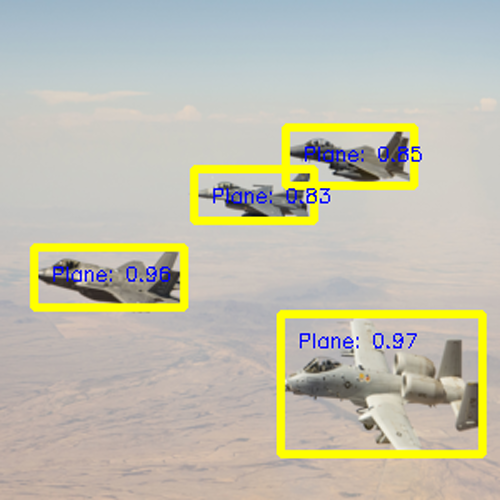

In [284]:
img = Image.open("assets/planes.jpeg")
img = img.resize((300, 300), Image.BILINEAR)

norm_img_data = preprocess_and_normalize(img)
response = send_message_ort(norm_img_data)
boxes, scores = parse_response(response)
result_image = get_results(img, boxes, scores)
path = "run_ssd_example_output.jpg"
res = cv2.resize(result_image, dsize=(500, 500), interpolation=cv2.INTER_CUBIC)
result = Image.fromarray(res, 'RGB')
result.save(path)
result